In [2]:
import glob
import os
import zipfile, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
def read_data(path):
    data = {}
    
    for file_path in glob.glob(f'{path}/**/Magnetometer.csv', recursive=True):
        df = pd.read_csv(file_path, delimiter='\t')
        cord = file_path.split('/')[2].split('_')[2:]
        cord = (float(cord[1]), float(cord[0]))
        
        mean_mag = df[["X (µT)", "Y (µT)", "Z (µT)"]].mean().to_numpy()
#         data.append(np.concatenate((cord, mean_mag)))
        data[cord] = mean_mag
        
    return data

In [120]:
grid_data = read_data('./Grid/')
float_grid_data = read_data('./FloatGrid/')
testing_grid_data = read_data('./TestingGrid/')

In [80]:
def convert(cord):
    print(float_grid_data[cord])
    float_grid_data[cord] = float_grid_data[cord][[1, 0, 2]]
    print(float_grid_data[cord])

In [99]:
grid_data[(1, 1)] = grid_data[(1, 1)][[0, 2, 1]]

-69.12503980414142 15.722583986633166
-42.162377713787876 44.94571371412061
-45.446246831161616 -6.974206358939698
5.378422686073768 76.9084500358735
17.106947466329316 77.28176880209324


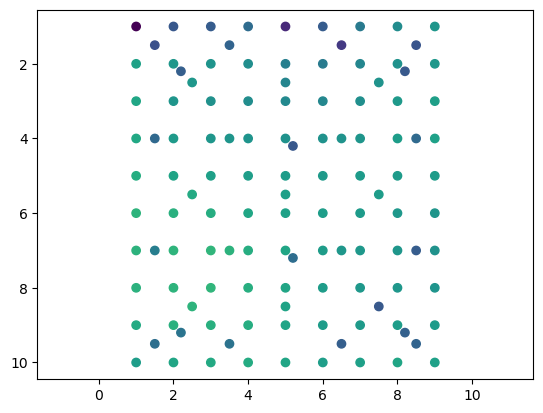

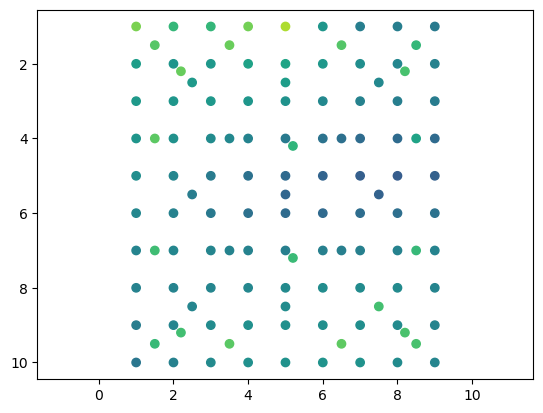

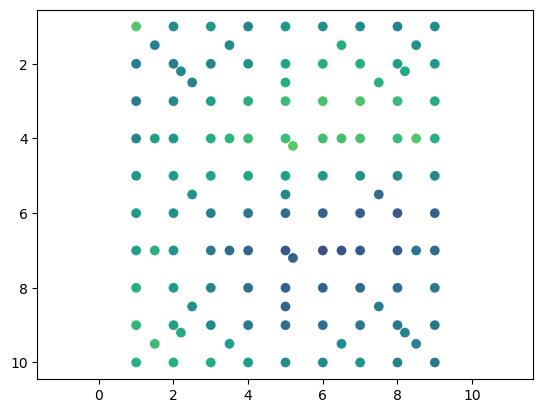

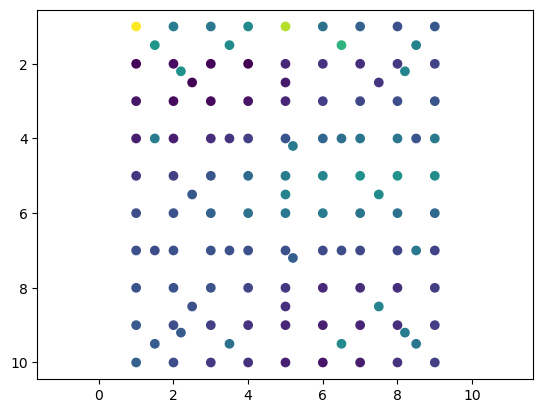

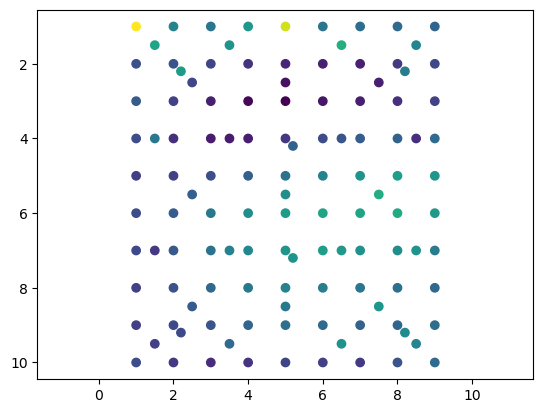

In [124]:
float_grid = np.array(list(grid_data.values()) + list(float_grid_data.values()) + list(testing_grid_data.values()))
float_grid_cord = np.array(list(grid_data.keys()) + list(float_grid_data.keys()) + list(testing_grid_data.keys()))

float_grid_cord[-6:] += 0.2
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]

magH = np.sqrt(np.sum(np.power(float_grid[:, 0:2], 2), axis=-1))
magT = np.sqrt(np.sum(np.power(float_grid, 2), axis=-1))
float_grid_magX = float_grid[:, 0]
float_grid_magY = float_grid[:, 1]
float_grid_magZ = float_grid[:, 2]

print(float_grid_magX.min(), float_grid_magX.max())
print(float_grid_magY.min(), float_grid_magY.max())
print(float_grid_magZ.min(), float_grid_magZ.max())
print(magH.min(), magH.max())
print(magT.min(), magT.max())

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magX)
mean = float_grid_magX.mean()
std = float_grid_magX.std()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX, vmin=mean-4*std, vmax=mean+4*std)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magY)
mean = float_grid_magY.mean()
std = float_grid_magY.std()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY, vmin=mean-4*std, vmax=mean+4*std)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magY)
mean = float_grid_magZ.mean()
std = float_grid_magZ.std()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ, vmin=mean-4*std, vmax=mean+4*std)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=magH)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=magT)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

-69.12503980414142 15.722583986633166
-42.162377713787876 44.94571371412061
-45.446246831161616 -7.586969240727273


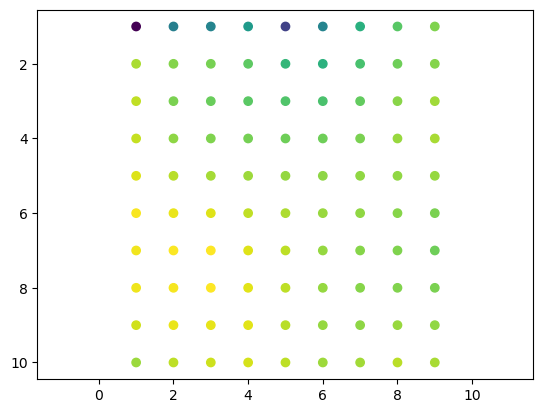

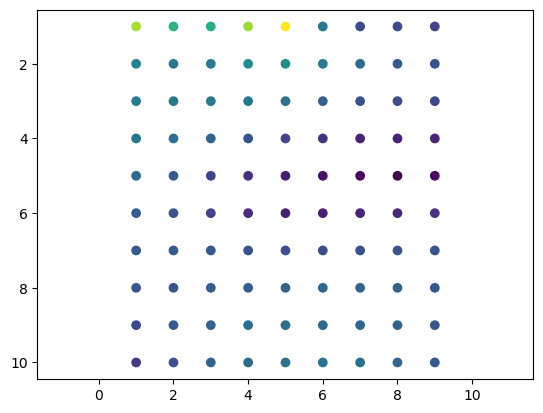

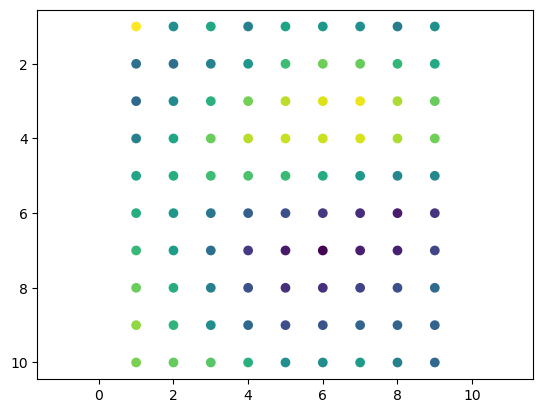

In [125]:
float_grid = np.array(list(grid_data.values()))
float_grid_cord = np.array(list(grid_data.keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 0]
float_grid_magY = float_grid[:, 1]
float_grid_magZ = float_grid[:, 2]

print(float_grid_magX.min(), float_grid_magX.max())
print(float_grid_magY.min(), float_grid_magY.max())
print(float_grid_magZ.min(), float_grid_magZ.max())

plt.figure()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

In [93]:
convert((1.5, 1.5))
convert((3.5, 1.5))
convert((6.5, 1.5))
convert((8.5, 1.5))

convert((1.5, 9.5))
convert((3.5, 9.5))
convert((6.5, 9.5))
convert((8.5, 9.5))

convert((1.5, 4))
convert((1.5, 7))
convert((8.5, 4))
convert((8.5, 7))

convert((7.5, 8.5))

[-35.58779709  23.95150857 -29.70043945]
[ 23.95150857 -35.58779709 -29.70043945]
[-27.00043236  29.24999214 -27.31956066]
[ 29.24999214 -27.00043236 -27.31956066]
[-46.08846105  23.48057744 -16.46975202]
[ 23.48057744 -46.08846105 -16.46975202]
[-34.00706718  13.76295026 -25.1057316 ]
[ 13.76295026 -34.00706718 -25.1057316 ]
[-21.51716781  14.88252339 -11.79801166]
[ 14.88252339 -21.51716781 -11.79801166]
[-19.09429755  25.05568194 -20.77114098]
[ 25.05568194 -19.09429755 -20.77114098]
[-29.16318681  26.42720818 -26.61165334]
[ 26.42720818 -29.16318681 -26.61165334]
[-26.79864956  20.07384698 -29.14655032]
[ 20.07384698 -26.79864956 -29.14655032]
[-24.47183632  26.12847268 -20.20951057]
[ 26.12847268 -24.47183632 -20.20951057]
[-13.3612433   17.44735944 -15.79572269]
[ 17.44735944 -13.3612433  -15.79572269]
[-24.05044422   0.72353163  -8.080137  ]
[  0.72353163 -24.05044422  -8.080137  ]
[-30.62169723  14.53230983 -34.10352395]
[ 14.53230983 -30.62169723 -34.10352395]
[-32.57509117  1

-9.77418764661111 29.249992139343437
-46.08846104678393 -3.4682180231060604
-44.081503709899486 -8.080137002343434


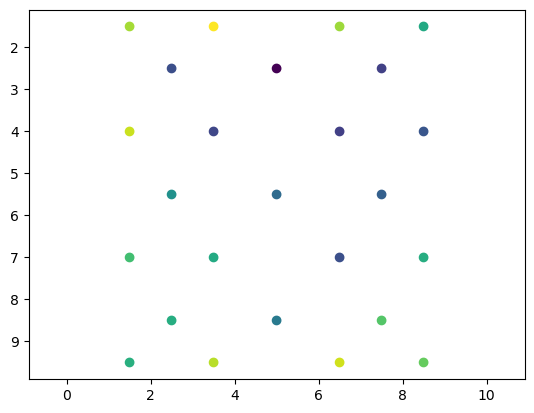

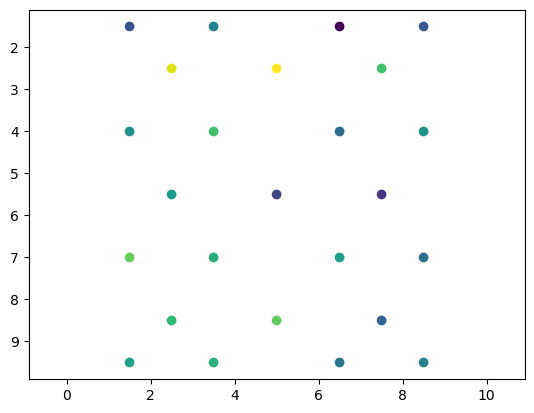

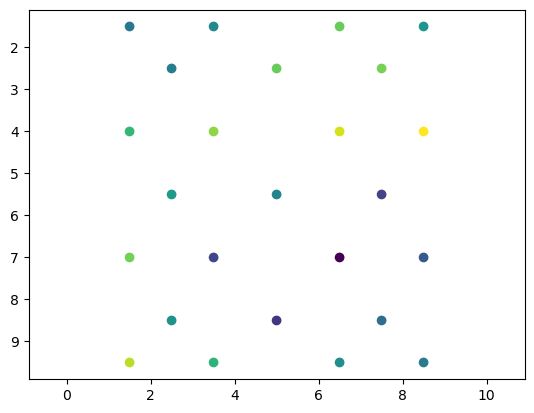

In [90]:
float_grid = np.array(list(float_grid_data.values()))
float_grid_cord = np.array(list(float_grid_data.keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 0]
float_grid_magY = float_grid[:, 1]
float_grid_magZ = float_grid[:, 2]

print(float_grid_magX.min(), float_grid_magX.max())
print(float_grid_magY.min(), float_grid_magY.max())
print(float_grid_magZ.min(), float_grid_magZ.max())

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magX)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
# plt.scatter(grid_x, grid_y, c=grid_magZ)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

In [ ]:
grid = type_dict['Grid'].T.to_numpy()
grid_x = grid[:, 4]
grid_y = grid[:, 5]
grid_magX = grid[:, 1]
grid_magY = grid[:, 2]
grid_magZ = grid[:, 3]

float_grid = np.array(list(sec_type_dict['FloatGrid'].values()))
float_grid_cord = np.array(list(sec_type_dict['FloatGrid'].keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 1]
float_grid_magY = float_grid[:, 2]
float_grid_magZ = float_grid[:, 3]

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magX)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magZ)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

In [4]:
# convert((1.5, 1.5))
# convert((3.5, 1.5))
# convert((6.5, 1.5))
# convert((8.5, 1.5))

# convert((1.5, 9.5))
# convert((3.5, 9.5))
# convert((6.5, 9.5))
# convert((8.5, 9.5))

# convert((1.5, 4))
# convert((1.5, 7))
# convert((8.5, 4))
# convert((8.5, 7))

# convert((7.5, 8.5))

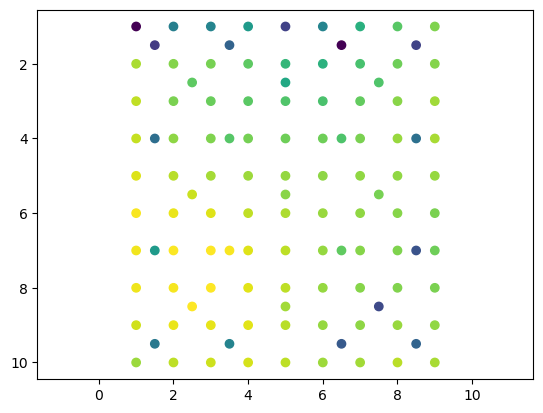

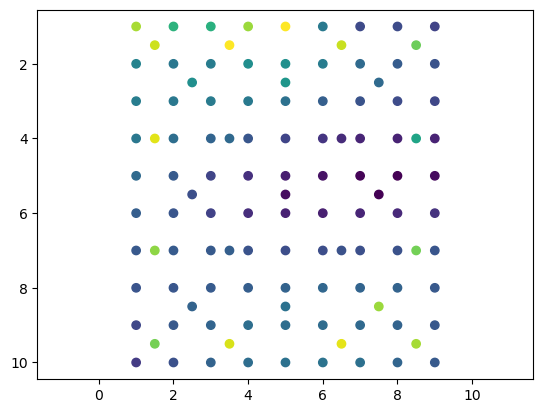

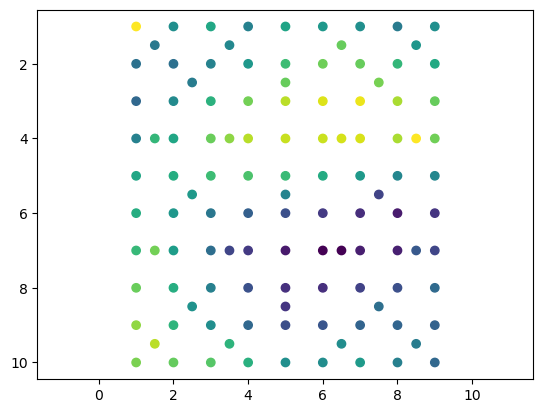

In [5]:
grid = type_dict['Grid'].T.to_numpy()
grid_x = grid[:, 4]
grid_y = grid[:, 5]
grid_magX = grid[:, 1]
grid_magY = grid[:, 2]
grid_magZ = grid[:, 3]

float_grid = np.array(list(sec_type_dict['FloatGrid'].values()))
float_grid_cord = np.array(list(sec_type_dict['FloatGrid'].keys()))
float_grid_x = float_grid_cord[:, 0]
float_grid_y = float_grid_cord[:, 1]
float_grid_magX = float_grid[:, 1]
float_grid_magY = float_grid[:, 2]
float_grid_magZ = float_grid[:, 3]

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magX)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magX)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magY)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magY)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

plt.figure()
plt.scatter(grid_x, grid_y, c=grid_magZ)
plt.scatter(float_grid_x, float_grid_y, c=float_grid_magZ)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()